In [1]:
%matplotlib inline
import pandas as pd

In [2]:
data=pd.read_csv('../food_truck.txt')

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [20]:
data[data['Profit']>24].head()

,Population,Profit
29,22.203,24.147


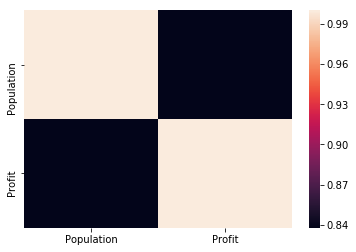

In [5]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [6]:
corr

,Population,Profit
Population,1.000000,0.837873
Profit,0.837873,1.000000


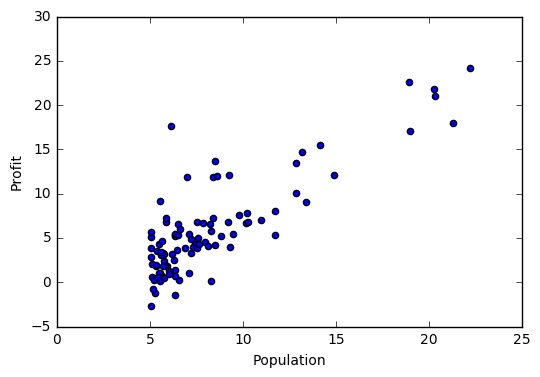

In [5]:
data.plot(x='Population',y='Profit',kind='scatter')

In [7]:
from sklearn import linear_model

In [39]:
model=linear_model.LinearRegression()

In [40]:
data.Population.shape

(97,)

In [41]:
data.shape[1]

2

In [42]:
model.fit(data['Population'].values.reshape(data.shape[0],1),data['Profit'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
model.coef_

array([ 1.19303364])

In [44]:
model.intercept_

-3.8957808783118519

In [45]:
y = 1.19303364*x -3.8957808783118519

In [46]:
predict = model.predict(data['Population'].values.reshape(data.shape[0],1))

In [21]:
predict

array([ 5.887095])

In [22]:
x=8.2

In [24]:
y

5.887094969688146

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train,test = train_test_split(data, test_size=0.2, random_state=42)

In [28]:
train.shape

(77, 2)

In [29]:
test.shape

(20, 2)

In [48]:
model2 = linear_model.LinearRegression()

In [49]:
model2.fit(train['Population'].values.reshape(train.shape[0],1),train['Profit'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
model2.coef_

array([ 1.28752876])

In [51]:
model2.intercept_

-4.7323975958063373

In [52]:
predict_test = model2.predict(test['Population'].values.reshape(test.shape[0],1))

In [53]:
predict_test

array([ 22.66492686,   2.22914165,   2.09845748,   3.54589731,
         1.94781662,   7.84508459,  19.67786014,  10.34198911,
         2.62029289,   3.13453187,   3.75164441,   3.69821196,
         2.73707175,  11.78402132,   5.34212868,   2.81226342,
         2.33626404,   2.65029231,   1.78172541,   4.57115646])

In [37]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(test['Profit'], predict_test)

15.709362447765187

In [47]:
mean_squared_error(data['Profit'], predict)

8.9539427519503576

In [55]:
predict_train = model2.predict(train['Population'].values.reshape(train.shape[0],1))

In [56]:
mean_squared_error(train['Profit'], predict_train)

7.3714248508641331

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = model.intercept_ + model.coef_*x

fig, ax = plt.subplots()  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Training Data')  

ax.set_ylim(0,100)
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

NameError: name 'np' is not defined

# Show a cross validation

In [62]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

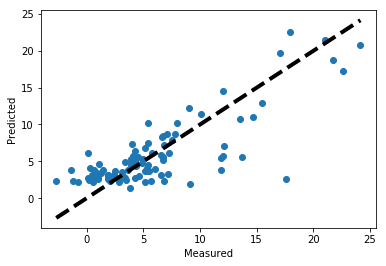

In [63]:
lr = linear_model.LinearRegression()
y=data.Profit.values
predicted = cross_val_predict(lr, data.Population.values.reshape(data.shape[0],1), data.Profit, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [65]:
mean_squared_error(data.Profit,predicted)

10.51755123134504

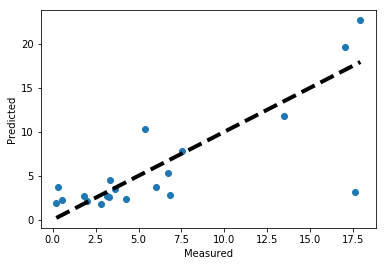

In [64]:
fig, ax = plt.subplots()
y= test.Profit.values
ax.scatter(y, predict_test)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()